## Figure 4 plot

In [1]:
import scipy.cluster.hierarchy as sch
import statsmodels.api as sm
from skbio.stats.ordination import pcoa
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import ward, fcluster
from scipy import stats
from scipy import cluster
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from statannot import add_stat_annotation
sns.set()

In [2]:
## Figure 4A - Clustering analysis

asv_rel = pd.read_csv('data/asv-rel.csv', index_col=0)
asv_baseline = asv_rel.filter(regex="D0$")
asv_baseline_id = [i.split('D')[0] for i in asv_baseline.columns]
asv_baseline.columns = asv_baseline_id
samplelabel = asv_baseline.columns

AAD = ['S2D0', 'S10D0', 'S15D0', 'S16D0', 'S24D0', 'S1D0',
          'S5D0', 'S6D0', 'S7D0', 'S13D0', 'S19D0', 'S20D0', 'S21D0']
AADv2 = [i.split('D')[0] for i in AAD]

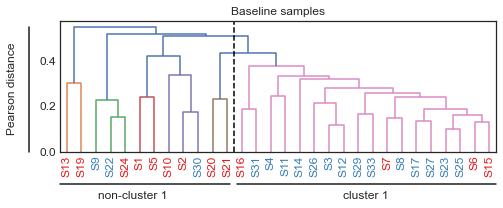

In [3]:
plt.style.use('seaborn-white')
cm = 1/2.54
fig,ax=plt.subplots(figsize=(18*cm,8*cm))
fig.subplots_adjust(bottom=0.2)

dendrogram = sch.dendrogram(sch.linkage(asv_baseline.T, method='average',
                            metric='correlation'), color_threshold=0.4, labels=samplelabel)
for tick_labels in ax.axes.get_xticklabels():
    tick_text = tick_labels.get_text()
    if tick_text in AADv2:
        tick_labels.set_color('#e41a1c')
        tick_text=tick_text.split('D')[0]
    else:
        tick_labels.set_color('#377eb8')
        tick_text=tick_text.split('D')[0]
ax.set_title('Baseline samples',fontsize=12)
ax.tick_params(axis='y', which='major', labelsize=12)
ax.tick_params(axis='x', which='major', labelsize=12,rotation=90)

# Group cut off at 0.4
plt.axhline(linestyle='--', y=-0.5,c='r')
plt.axvline(linestyle='--', x=120,c='black')

trans = ax.get_xaxis_transform()
trans1 = ax.get_yaxis_transform()
ax.annotate('non-cluster 1', xy=(50, -0.3), xycoords=trans, ha="center", va="top",fontsize=12)
ax.plot([0,117],[-0.25,-0.25], color="k", transform=trans, clip_on=False)
ax.annotate('cluster 1', xy=(210, -0.3), xycoords=trans, ha="center", va="top",fontsize=12)
ax.plot([122,300],[-0.25,-0.25], color="k", transform=trans, clip_on=False)

ax.annotate('Pearson distance', xy=(-0.12, 0.28), xycoords=trans1, ha="left", va="center",rotation=90, fontsize=12)
ax.plot([-0.07,-0.07],[0,0.55], color="k", transform=trans1, clip_on=False)
plt.tight_layout()
plt.savefig('plots/Figure4A_clustering.svg',dpi=300)


In [4]:
## Figure 4B - Ruminococaccae relative abundance box plots

asv_rel_f = pd.read_csv('data/asv-level-5-rel.csv', index_col=0)
asv_rel_f_rumino = asv_rel_f[asv_rel_f.index.str.contains('Ruminococcaceae')]
asv_rumino_baseline = asv_rel_f_rumino.filter(regex='D0$')
asv_rumino_baseline = asv_rumino_baseline[asv_rumino_baseline.sum(
    axis=1) != 0]
rumino_baseline_sum = asv_rumino_baseline.sum(axis=0).to_frame()

AAD = ['S2D0', 'S10D0', 'S15D0', 'S16D0', 'S24D0', 'S1D0',
       'S5D0', 'S6D0', 'S7D0', 'S13D0', 'S19D0', 'S20D0', 'S21D0']
nonAAD = ['S3D0', 'S4D0', 'S8D0', 'S9D0', 'S11D0', 'S12D0', 'S14D0', 'S17D0',
          'S22D0', 'S23D0', 'S25D0', 'S26D0', 'S27D0', 'S29D0', 'S30D0', 'S31D0', 'S33D0']

# reformat for rumino in AAD and non-AAD groups
rumino_baseline_sum.columns = ['value']
rumino_baseline_sum.loc[AAD, 'Group'] = 'AAD'
rumino_baseline_sum.loc[nonAAD, 'Group'] = 'non-AAD'

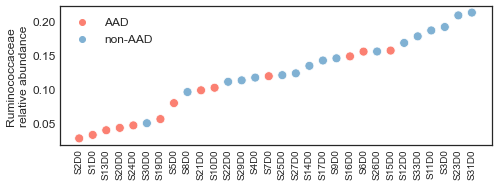

In [5]:
reorderedid = rumino_baseline_sum['value'].sort_values(ascending=True).index
rumino_baseline_sum_ascen = rumino_baseline_sum.loc[reorderedid]
xtickid = reorderedid.tolist()

plt.style.use('seaborn-white')
cm = 1/2.54
fig, ax = plt.subplots(figsize=(18*cm, 7*cm))
fontvalue = 12
sns.scatterplot(x=range(0, 30, 1), y='value', data=rumino_baseline_sum_ascen,
                hue='Group', palette=['#fb8072', '#80b1d3'], s=80)
ax.set_ylabel('Ruminococcaceae \nrelative abundance', fontsize=fontvalue)

ax.tick_params(axis='x', labelsize=10, direction="in", rotation=45)
ax.tick_params(axis='y', labelsize=fontvalue, direction="in")

ax.set_xticks(np.arange(len(xtickid)))
ax.set_xticklabels(xtickid, rotation=90)
ax.legend(fontsize=fontvalue)
plt.tight_layout()
plt.savefig('plots/Figure4B_Rumino_abundance.svg', dpi=300)

In [6]:
## Figure 4C - F. prausnitzii qPCR box plots
df = pd.read_csv('data/faecali_qpcr.csv')
orderedid = ['S2D0', 'S1D0', 'S13D0', 'S20D0', 'S24D0', 'S30D0', 'S19D0', 'S5D0', 'S8D0', 'S21D0', 'S10D0', 'S22D0', 'S29D0', 'S4D0',
             'S7D0', 'S25D0', 'S27D0', 'S14D0', 'S17D0', 'S9D0', 'S16D0', 'S6D0', 'S26D0', 'S15D0', 'S12D0', 'S33D0', 'S11D0', 'S3D0', 'S23D0', 'S31D0']
df['Sample ID'] = pd.Categorical(
    df['Sample ID'], categories=orderedid, ordered=True)
df['100*normalized.1 (GC/uL)'] = df['normalized.1 (GC/uL)']*100 # dilution factor

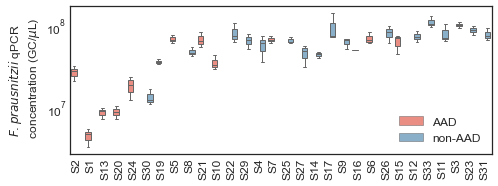

In [7]:
plt.style.use('seaborn-white')
cm = 1/2.54
fig, ax = plt.subplots(figsize=(18*cm, 7*cm))
fontvalue = 12
sns.boxplot(data=df, x='Sample ID', y='100*normalized.1 (GC/uL)', hue='Group',
            palette=['#fb8072', '#80b1d3'], order=orderedid, linewidth=1)  # s=200,
ax.set_xlabel(xlabel='', fontsize=fontvalue)
ax.set_ylabel(
    ylabel='$\it{F.prausnitzii}$ qPCR \n  concentration (GC/'+r'$\mu$'+'L)', fontsize=fontvalue)
ax.tick_params(axis='x', rotation=90, labelsize=12)
ax.tick_params(axis='y', labelsize=fontvalue)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels = [i.split('D')[0] for i in labels]
ax.set_xticklabels(labels)

plt.yscale('log')
plt.tight_layout()
plt.legend(fontsize=fontvalue, markerscale=3, loc='lower right')
plt.savefig('plots/Figure4C_normalized_faecali_concentration_boxplt.svg',dpi=300)

In [8]:
## Figure 4D - correlation
df = pd.read_csv('data/faecali_qpcr_16S_corr.csv', index_col=False)
print(stats.spearmanr(df['Faecali species qPCR concentration.1.median'], df['Rumino 16S abundance']))

SpearmanrResult(correlation=0.8487208008898777, pvalue=3.1143392525566432e-09)


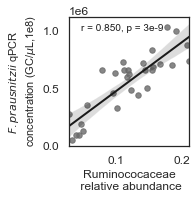

In [9]:
sns.set(style='white', font="Arial")
cm = 1/2.54
fig, ax = plt.subplots(figsize=(5.5*cm, 6*cm))
sns.regplot(data=df, y='Faecali species qPCR concentration.1.median', x='Rumino 16S abundance',
            scatter_kws={'s': 30}, line_kws={'lw': 2, 'color': 'k'}, color='dimgray')
ax.set_ylabel(
    '$\it{F.prausnitzii}$ qPCR\n concentration (GC/'+r'$\mu$'+'L,1e8)', fontsize=11)
ax.set_xlabel('Ruminococaceae\n relative abundance', fontsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.yaxis.set_ticks(np.arange(0, 1.5e6, 0.5e6))

ax.yaxis.get_offset_text().set_fontsize(12)
plt.text(0.1, 0.9, 'r = 0.850, p = 3e-9', fontsize=10,
         transform=ax.transAxes, color='k')
plt.savefig("plots/Figure4D_correlation_v5_median.svg", dpi=300)


In [10]:
## Figure 4E - probability analysis
qPCR = pd.read_csv('data/faecali_qpcr.csv')
qPCR = qPCR.dropna()
aad_g = qPCR[qPCR['Group'] == 'AAD']['normalized.1 (GC/uL)'].tolist()
nonaad_g = qPCR[qPCR['Group'] == 'non-AAD']['normalized.1 (GC/uL)'].tolist()
minnum = np.min(aad_g)
maxnum = np.max(nonaad_g)
aad_g = [(x-minnum)/(maxnum-minnum) for x in aad_g]
nonaad_g = [(x-minnum)/(maxnum-minnum) for x in nonaad_g]
aad_np = np.array(aad_g)
nonaad_np = np.array(nonaad_g)
range_num = 10000
range_aad = np.zeros((len(aad_g), range_num))
range_nonaad = np.zeros((len(nonaad_g), range_num))
data_std = 0.1


def normal(x_mean, x, stand_d):
    return np.exp(-1*(x-x_mean)**2/2/stand_d**2)


for i in range(len(aad_g)):
    print('aad', i)
    for j in range(range_num):
        range_aad[i, j] = normal(aad_np[i], j/range_num, data_std)

for i in range(len(nonaad_g)):
    print('nonaad', i)
    for j in range(range_num):
        range_nonaad[i, j] = normal(nonaad_np[i], j/range_num, data_std)

aad_dist = np.sum(range_aad, 0)
nonaad_dist = np.sum(range_nonaad, 0)

faecaliqpcr_aad_normalized = aad_dist/(aad_dist+nonaad_dist)
faecaliqpcr_nonaad_normalized = 1-faecaliqpcr_aad_normalized


aad 0
aad 1
aad 2
aad 3
aad 4
aad 5
aad 6
aad 7
aad 8
aad 9
aad 10
aad 11
aad 12
aad 13
aad 14
aad 15
aad 16
aad 17
aad 18
aad 19
aad 20
aad 21
aad 22
aad 23
aad 24
aad 25
aad 26
aad 27
aad 28
aad 29
aad 30
aad 31
aad 32
aad 33
aad 34
aad 35
aad 36
aad 37
nonaad 0
nonaad 1
nonaad 2
nonaad 3
nonaad 4
nonaad 5
nonaad 6
nonaad 7
nonaad 8
nonaad 9
nonaad 10
nonaad 11
nonaad 12
nonaad 13
nonaad 14
nonaad 15
nonaad 16
nonaad 17
nonaad 18
nonaad 19
nonaad 20
nonaad 21
nonaad 22
nonaad 23
nonaad 24
nonaad 25
nonaad 26
nonaad 27
nonaad 28
nonaad 29
nonaad 30
nonaad 31
nonaad 32
nonaad 33
nonaad 34
nonaad 35
nonaad 36
nonaad 37
nonaad 38
nonaad 39
nonaad 40
nonaad 41
nonaad 42
nonaad 43
nonaad 44
nonaad 45
nonaad 46
nonaad 47
nonaad 48
nonaad 49


In [11]:

aad_g = qPCR[qPCR['Group'] == 'AAD']['normalized.1 (GC/uL)'].tolist()
nonaad_g = qPCR[qPCR['Group'] == 'non-AAD']['normalized.1 (GC/uL)'].tolist()
minnum = np.min(aad_g)
maxnum = np.max(nonaad_g)
left_n = minnum/((maxnum-minnum)/10000)
right_n = (1.4e6-maxnum)/((maxnum-minnum)/10000)
print(left_n)
print(right_n)


232.8779637346944
52.65130843153264


In [12]:
infront = np.repeat(np.nan, 233)
end = np.repeat(np.nan, 53)
step1 = np.append(infront, faecaliqpcr_aad_normalized)
faecaliqpcr_aad_normalized_add = np.append(step1, end)


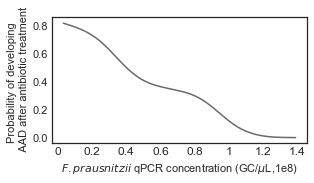

In [13]:
plt.style.use('seaborn-white')
cm = 1/2.54
fig, ax = plt.subplots(figsize=(11.5*cm, 6.5*cm))

ax.plot(faecaliqpcr_aad_normalized_add, color='dimgray', linewidth=1.5,
        linestyle='-', label='$\it{F.prausnitzii}$-qPCR')  # fb8072
ax.set_xlabel('$\it{F.prausnitzii}$ qPCR concentration (GC/' +
              r'$\mu$' + 'L,1e8)', fontsize=11)
plt.ylabel(
    'Probability of developing \n AAD after antibiotic treatment', fontsize=11)

range_num = faecaliqpcr_aad_normalized_add.shape[0]
ax.set_xticks([0, range_num/7*1, range_num/7*2, range_num/7*3,
              range_num/7*4, range_num/7*5, range_num/7*6, range_num/7*7])
ax.set_xticklabels(('0', '0.2', '0.4', '0.6', '0.8',
                   '1', '1.2', '1.4'), size=12)
plt.tight_layout()
plt.savefig('plots/Figure4E_probability.svg', dpi=300)


In [14]:
## What is the F. prausnitzii qPCR concentration if AAD probability is > 0.7
idx = np.where(faecaliqpcr_aad_normalized_add > 0.7)[0][-1]
range_num = faecaliqpcr_aad_normalized_add.shape[0]
idx/range_num*1.4


0.23546568150884697

In [15]:
## What is the F. prausnitzii qPCR concentration if AAD probability is < 0.3
idx = np.where(faecaliqpcr_aad_normalized_add < 0.3)[0][0]
range_num = faecaliqpcr_aad_normalized_add.shape[0]
idx/range_num*1.4

0.7984055998444487